# Import Python Libraries

In [1]:
from pathlib import Path
import sys
import  numpy as np 
import pandas as pd
import pandas_profiling as pdf 
import matplotlib.pyplot as plt  
import  seaborn as  sns 
%matplotlib inline

#libararies for working in EXCEL
import openpyxl

#DateTime Library
from datetime import timedelta
from datetime import datetime as dt


# Load Excel File

In [2]:

filename = "/content/Second Sheet.xlsx"
wb = openpyxl.load_workbook(filename)

#Accessing the WorkSheet on Excel need to be edited
sheet = wb['Sheet0']

#Print Out the Cell Value
status = sheet.cell(sheet.min_row, 1).value
print(status)

#Delete the first 3 Rows 
sheet.delete_rows(1,3)

#delete # Culomn > First culomn
sheet.delete_cols(1)

#Delete Transaction Type, Transaction Date Culomn 
sheet.delete_cols(4,2)

#Delete the last 3 culomns > Comment, Free, Missing item name
sheet.delete_cols(6,3)

#Saving the Modified Excel File 
wb.save("/content/SecSheet.xlsx")

Restaurant


## Read Excel File as DataFrame

In [3]:
df = pd.read_excel("/content/SecSheet.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           38 non-null     object 
 1   Branch               38 non-null     object 
 2   Order #              38 non-null     int64  
 3   Order Creation Date  38 non-null     object 
 4   Amount               38 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ KB


In [5]:
df.dtypes

Restaurant              object
Branch                  object
Order #                  int64
Order Creation Date     object
Amount                 float64
dtype: object

Display the  First 5 Culom in the DataFrame(Excel sheet)

In [6]:
df.head()

,Restaurant,Branch,Order #,Order Creation Date,Amount
0,Hamburgini - هامبرغيني,Al Khaleej,36620581,13/12/2020 11:01:18 PM,23.0
1,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,14/12/2020 01:16:48 AM,48.0
2,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,14/12/2020 01:16:48 AM,48.0
3,Hamburgini - هامبرغيني,Al Azizia,36632279,14/12/2020 12:28:31 AM,35.0
4,Hamburgini - هامبرغيني,Al Azizia,36632279,14/12/2020 12:28:31 AM,35.0


Convert Order Creation Date To date time type 

In [7]:
df['Order Creation Date'] = pd.to_datetime(df['Order Creation Date'])

In [8]:
df.dtypes

Restaurant                     object
Branch                         object
Order #                         int64
Order Creation Date    datetime64[ns]
Amount                        float64
dtype: object

In [9]:
df.head()

,Restaurant,Branch,Order #,Order Creation Date,Amount
0,Hamburgini - هامبرغيني,Al Khaleej,36620581,2020-12-13 23:01:18,23.0
1,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,2020-12-14 01:16:48,48.0
2,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,2020-12-14 01:16:48,48.0
3,Hamburgini - هامبرغيني,Al Azizia,36632279,2020-12-14 00:28:31,35.0
4,Hamburgini - هامبرغيني,Al Azizia,36632279,2020-12-14 00:28:31,35.0


Deduct five hours of Order Creation Date

In [10]:
df['Order Creation Date'] = pd.to_datetime(df['Order Creation Date']) - timedelta(hours=5)


In [11]:
df.head()

,Restaurant,Branch,Order #,Order Creation Date,Amount
0,Hamburgini - هامبرغيني,Al Khaleej,36620581,2020-12-13 18:01:18,23.0
1,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,2020-12-13 20:16:48,48.0
2,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,2020-12-13 20:16:48,48.0
3,Hamburgini - هامبرغيني,Al Azizia,36632279,2020-12-13 19:28:31,35.0
4,Hamburgini - هامبرغيني,Al Azizia,36632279,2020-12-13 19:28:31,35.0


Convert Order Creation Date To Object

In [12]:
df_copy = df.copy()

In [13]:
df_copy['Order Creation Date']=df_copy['Order Creation Date'].dt.strftime("%Y/%m/%d %H:%M:%S %p")

In [14]:
df_copy.dtypes

Restaurant              object
Branch                  object
Order #                  int64
Order Creation Date     object
Amount                 float64
dtype: object

In [15]:
df_copy.head()

,Restaurant,Branch,Order #,Order Creation Date,Amount
0,Hamburgini - هامبرغيني,Al Khaleej,36620581,2020/12/13 18:01:18 PM,23.0
1,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,2020/12/13 20:16:48 PM,48.0
2,Hamburgini - هامبرغيني,Al-Jazeerah,36636541,2020/12/13 20:16:48 PM,48.0
3,Hamburgini - هامبرغيني,Al Azizia,36632279,2020/12/13 19:28:31 PM,35.0
4,Hamburgini - هامبرغيني,Al Azizia,36632279,2020/12/13 19:28:31 PM,35.0


In [16]:
#save DataFrame to Excel Sheet afrter deduc 5 hours 
df_copy.to_excel("/content/SecSheetDeduc.xlsx")

In [17]:
df.columns

Index(['Restaurant', 'Branch', 'Order #', 'Order Creation Date', 'Amount'], dtype='object')

## **PivotTables**

In [18]:
#Number of Orders/Branch 
Order_Branch_Pivot = pd.pivot_table(df_copy,'Order #',index=['Branch'], aggfunc='count',margins=True, margins_name="Total")

In [19]:
Order_Branch_Pivot

,Order #
Branch,
Al Azizia,3
Al Balad,3
Al Khaleej,2
Al Manar,1
Al Murooj,1
Al Quds,1
Al Rabie,1
Al Rabwa,3
Al Rayyan - Buraidah,2


In [30]:
#Amount /branch 
Amount_Branch_Pivot = pd.pivot_table(df_copy,'Amount',index=['Branch'], aggfunc='sum',margins=True, margins_name="Total")

In [31]:
Amount_Branch_Pivot

,Amount
Branch,
Al Azizia,91.0
Al Balad,81.0
Al Khaleej,194.0
Al Manar,17.0
Al Murooj,14.0
Al Quds,34.0
Al Rabie,63.0
Al Rabwa,32.0
Al Rayyan - Buraidah,45.0


In [32]:
#Number of Order /Day 
Amount_Branch_Date_Pivot = pd.pivot_table(df,'Order #',index=df["Order Creation Date"].dt.strftime('%Y-%m-%d'), aggfunc='count',margins=False, margins_name="Total")

In [33]:
Amount_Branch_Date_Pivot


,Order #
Order Creation Date,
2020-10-12,1
2020-12-12,1
2020-12-13,16
2020-12-14,20


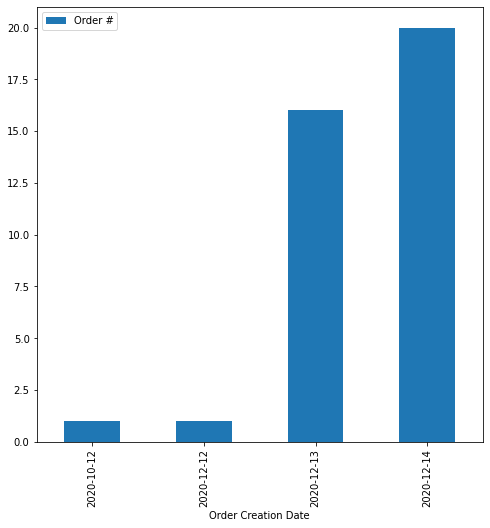

In [34]:
Amount_Branch_Date_Pivot.plot(kind="bar", figsize=(8,8))
plt.show()

In [38]:
#Number of Order/Day for each Branch
Branch_Date_Pivot = pd.pivot_table(df,'Order #',index=["Branch"],columns=df["Order Creation Date"].dt.strftime('%Y-%m-%d'), aggfunc='count',fill_value=0)

In [39]:
Branch_Date_Pivot

Order Creation Date,2020-10-12,2020-12-12,2020-12-13,2020-12-14
Branch,,,,
Al Azizia,0,0,3,0
Al Balad,0,0,1,2
Al Khaleej,0,1,1,0
Al Manar,0,0,0,1
Al Murooj,0,0,0,1
Al Quds,0,0,0,1
Al Rabie,0,0,1,0
Al Rabwa,0,0,1,2
Al Rayyan - Buraidah,0,0,0,2


In [40]:
Amount_Branch_Pivot.to_excel("Amount_Branch_Pivot.xlsx")

In [134]:
#installing xlsxwriter library
!pip install xlsxwriter

     |████████████████████████████████| 153kB 5.6MB/s 


In [41]:
import xlsxwriter

writer = pd.ExcelWriter("/content/PivotTables.xlsx", engine='xlsxwriter')
df_copy.to_excel(writer, sheet_name='DataFrame')

Amount_Branch_Pivot.to_excel(writer, sheet_name='Amount_Branch_Pivot')
Order_Branch_Pivot.to_excel(writer, sheet_name='Order_Branch_Pivot')
Branch_Date_Pivot.to_excel(writer, sheet_name='Branch_Date_Pivot')
Amount_Branch_Date_Pivot.to_excel(writer, sheet_name='Amount_Branch_Date_Pivot')

writer.save()

In [136]:

writer = pd.ExcelWriter("/content/PivotTables.xlsx", engine='xlsxwriter')
Amount_Branch_Pivot.to_excel(writer, sheet_name='Amount_Branch_Pivot')
wb.save("/content/SecSheet.xlsx")
writer.save()